In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [8]:
# Get only the cubes that have our line of interest in them
mol_tag = 42003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=9>
   FREQ      ERR    LGINT    DR     ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2         1 / cm                                     
 float64   float64 float64 int64  float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- --------- ----- ----- ----- -------- --------
85560.0605  0.0101 -5.3448     3  225.3302   153 42003  1404 25 124 0 25 125 0
85594.5124  0.0061 -5.2697     3  274.3848    51 42003  1404 25 124 1 26 224 0
85633.1625  0.2382 -7.3558     3 1218.4636   119 42003  1404 59 257 0 59 258 0
86120.3113   0.023 -5.3532     3  104.6044    45 42003  1404  7 2 6 1  6 3 4 0
86139.2718   0.023 -5.3529     3  104.6044    45 42003  1404  7 2 5 1  6 3 3 0
86159.3263  0.0112  -6.182     3  291.7872    53 42003  1404 26 125 1 26 126 1
86474.1821  0.0335 -5.1137     3  484.7021   207 42003  1404 34 331 0 34 233 1
87069.2812  1.9845 -8.5552     3 2247.3152   483 42003  1404 80 278 1 80 378 0
87403.4869  0.3779  -8.035     3 1

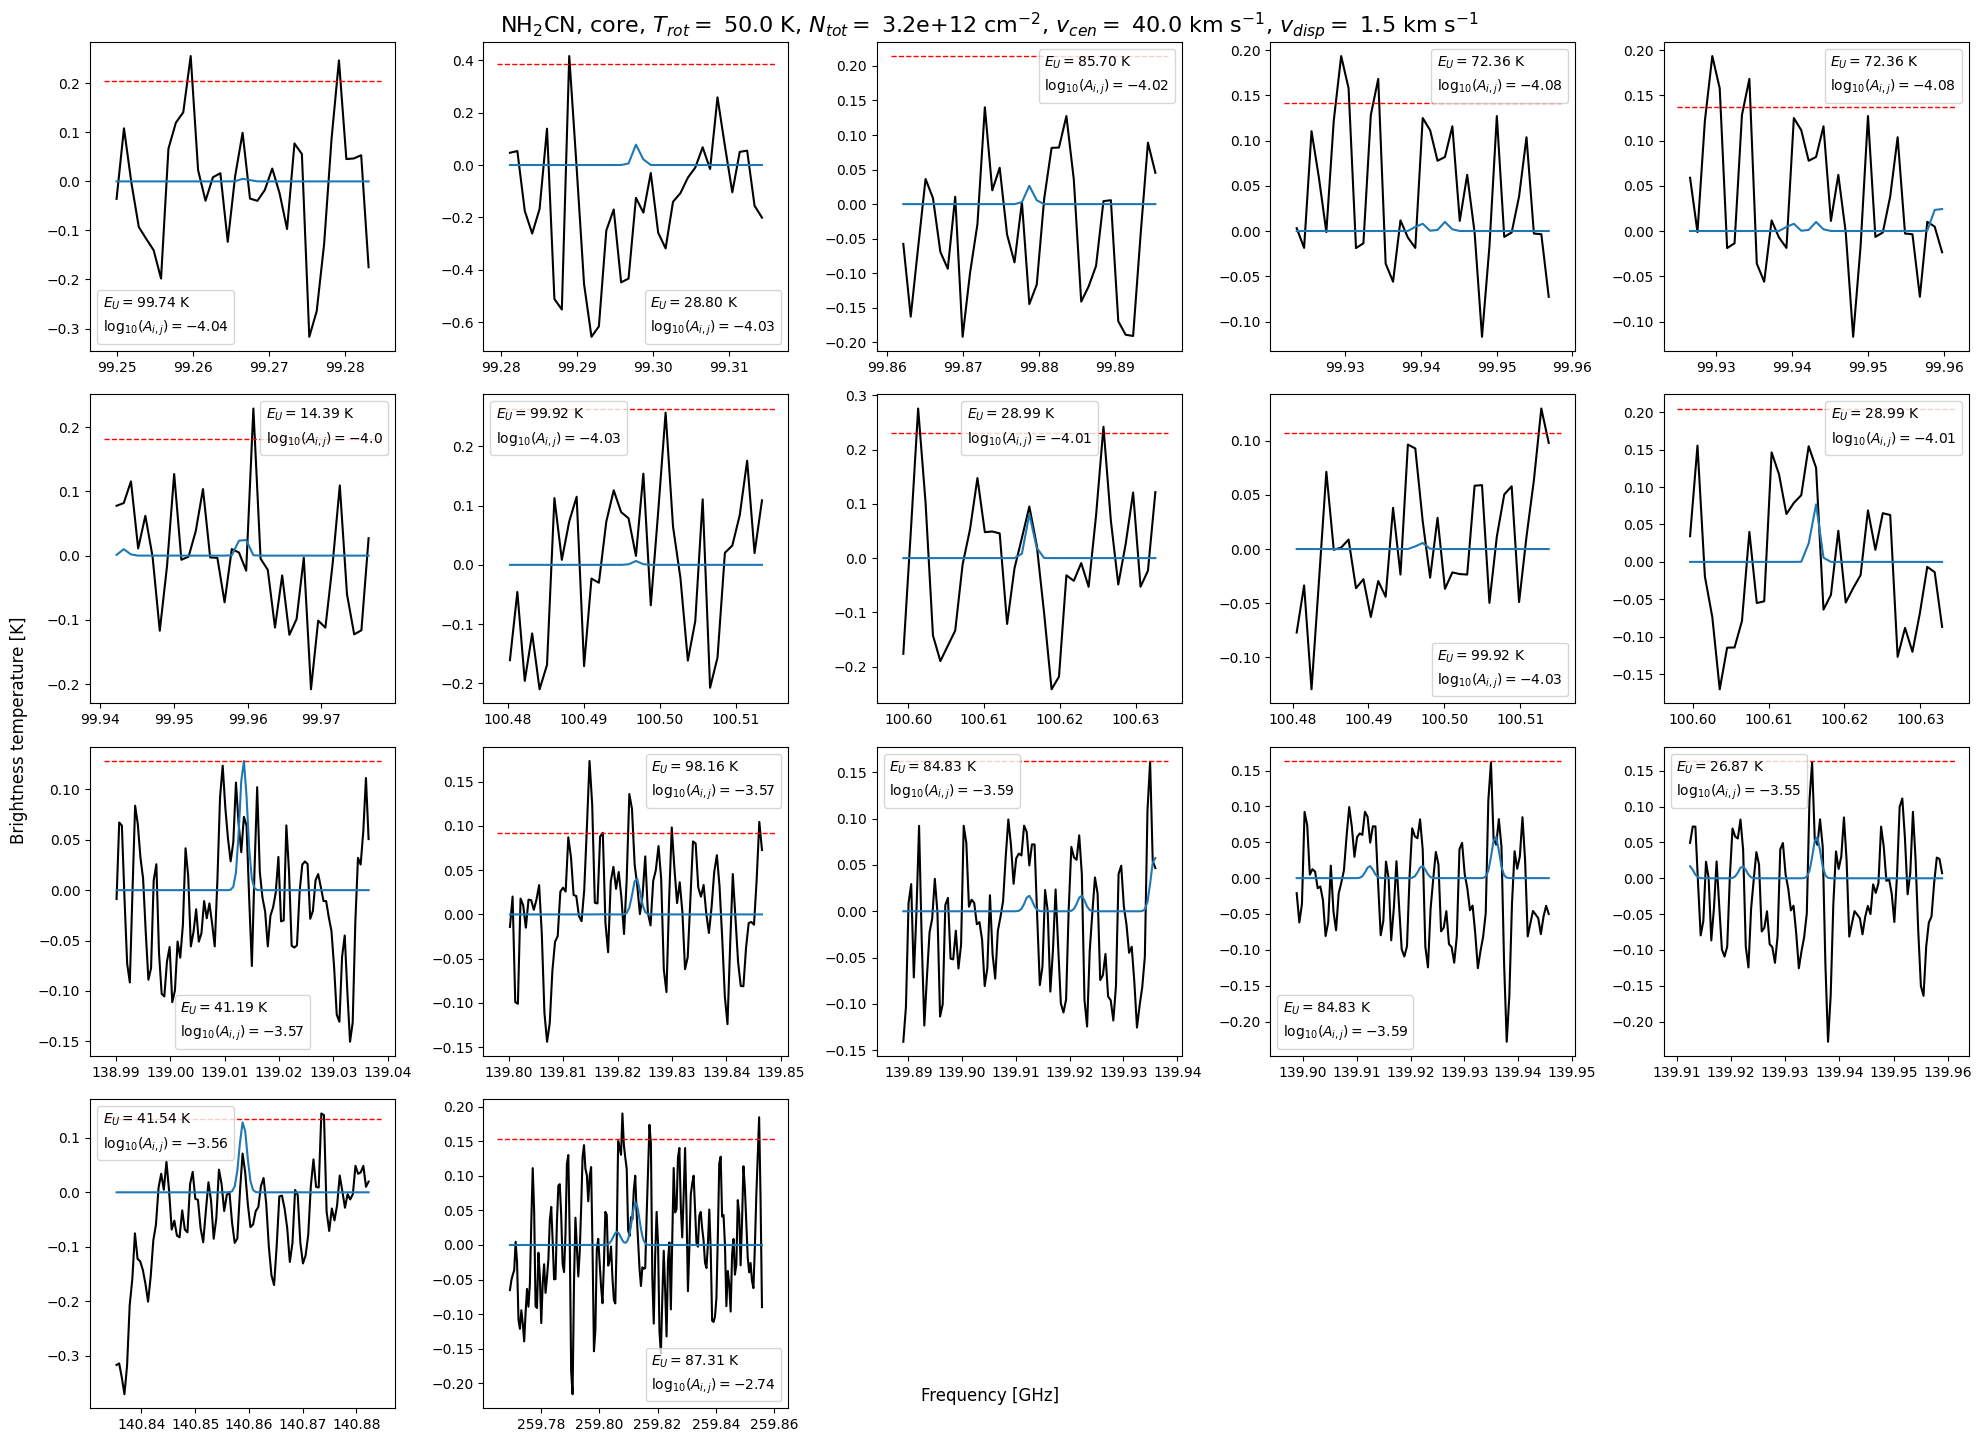

In [21]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 3.2e+12, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=4, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'NH$_2$CN', extr_type="coord", crd=crd,
               show_2_sigma=True)

In [15]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

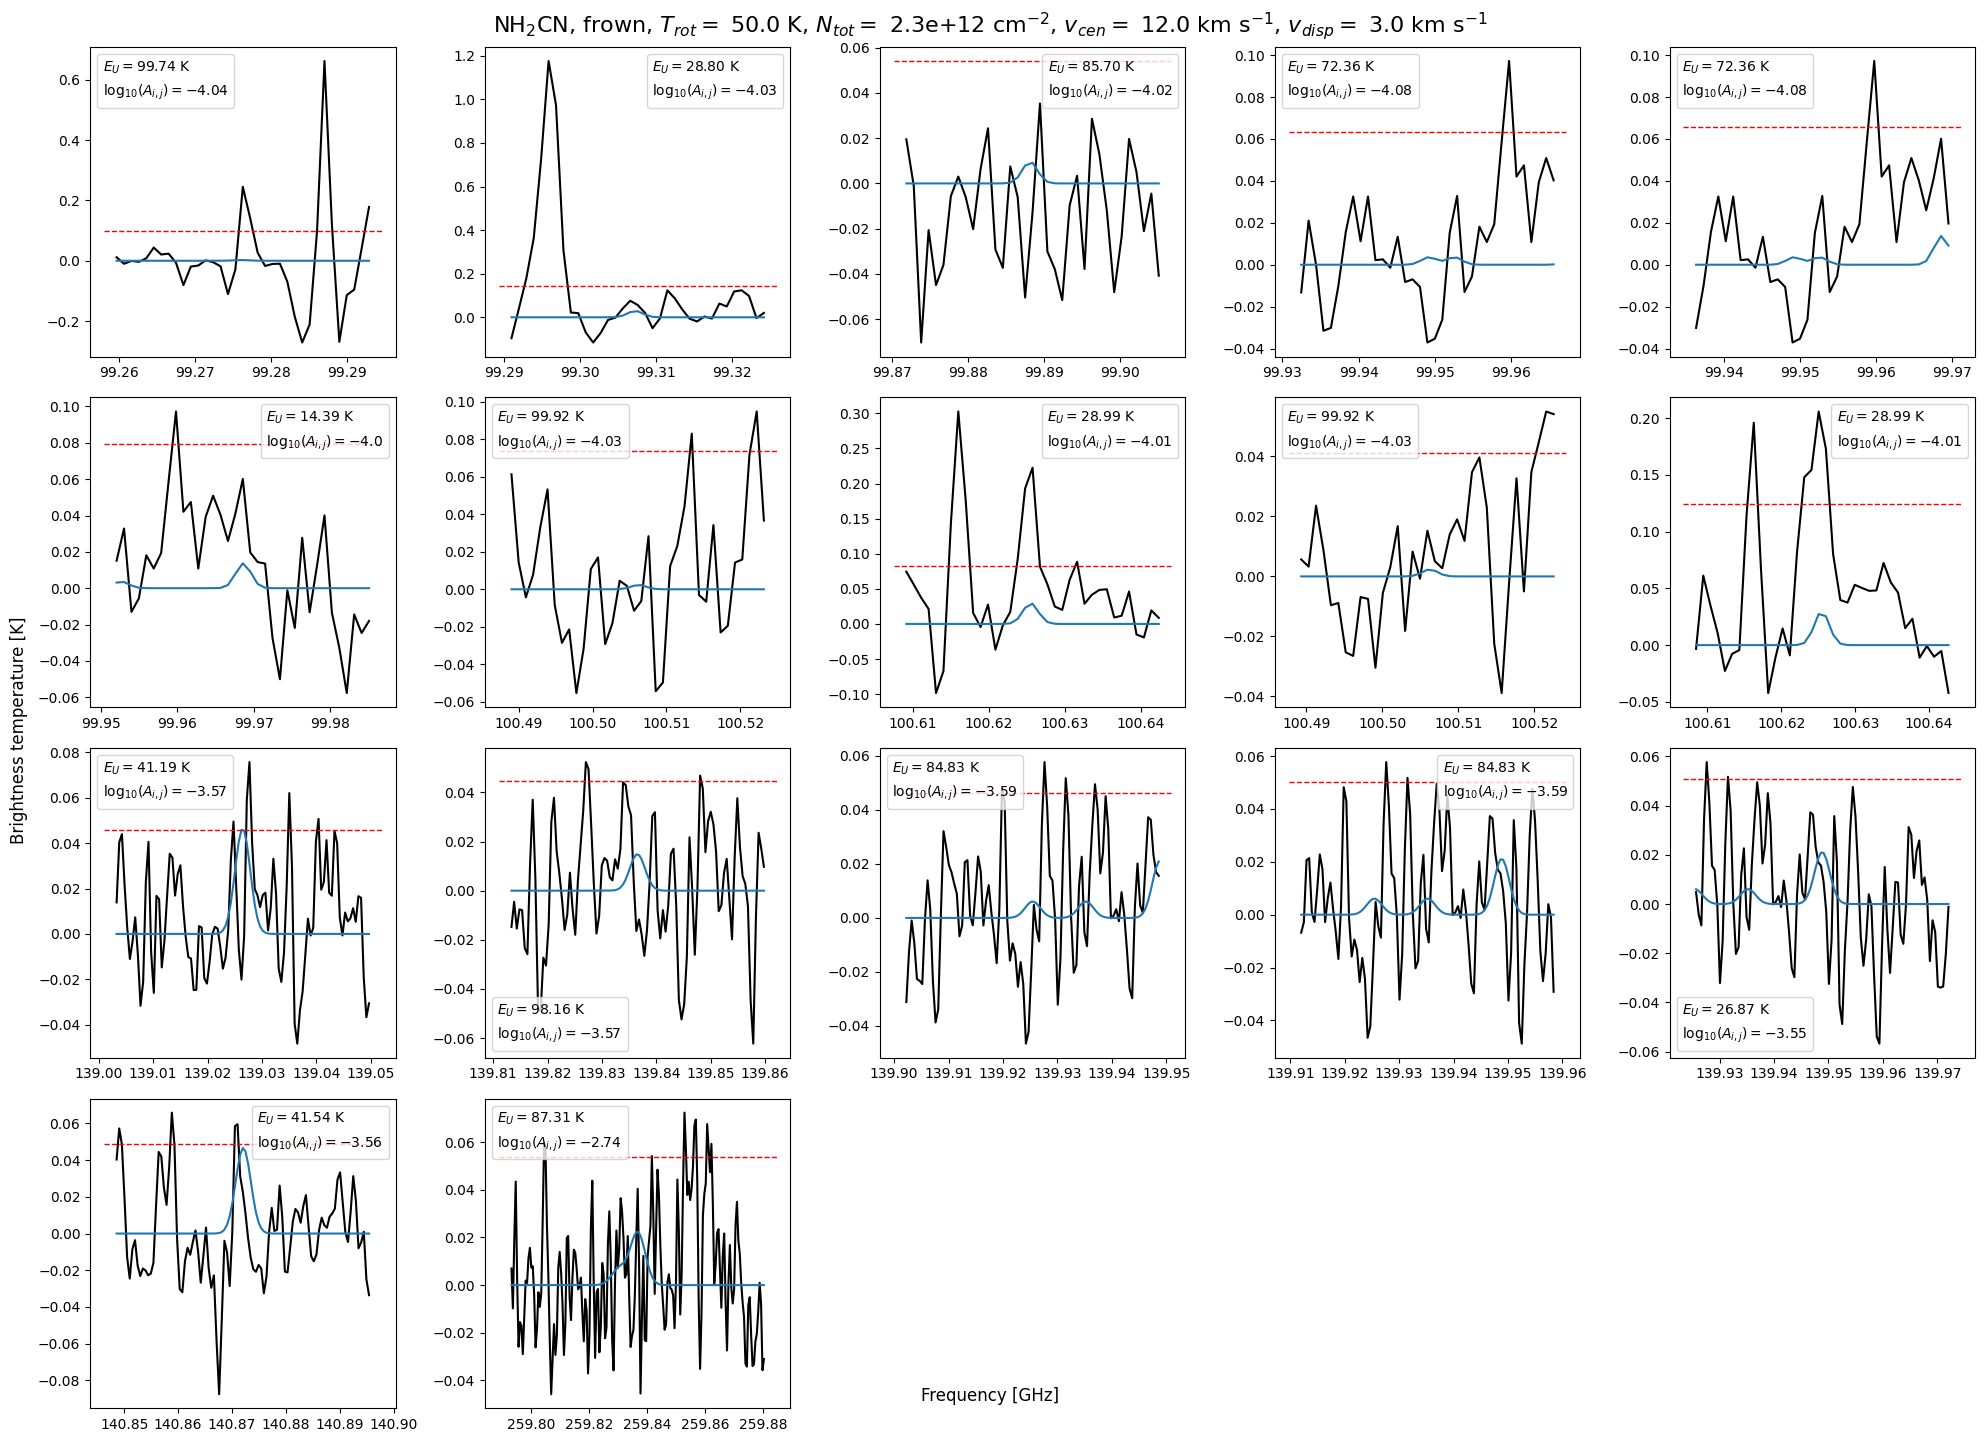

In [33]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 2.3e+12, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                       nrows=4, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'NH$_2$CN', extr_type="reg", 
                       show_2_sigma=True, return_freqs=True)

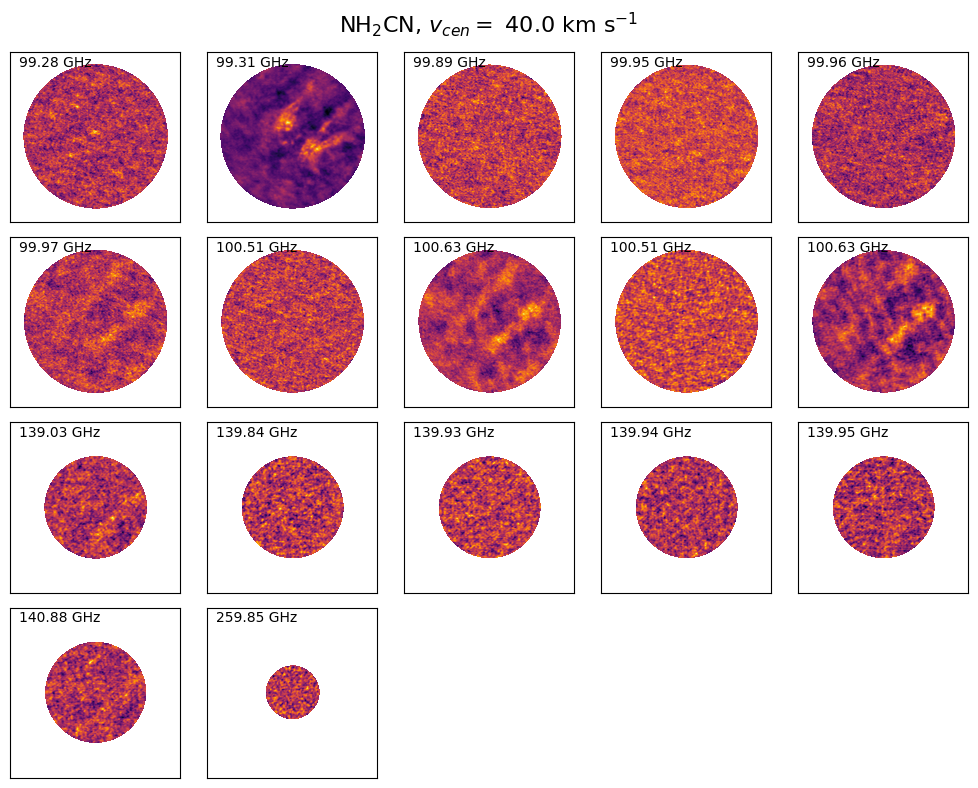

In [23]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=10, fig_height=8, nrows=4, ncols=5, name_for_plot=f'NH$_2$CN')

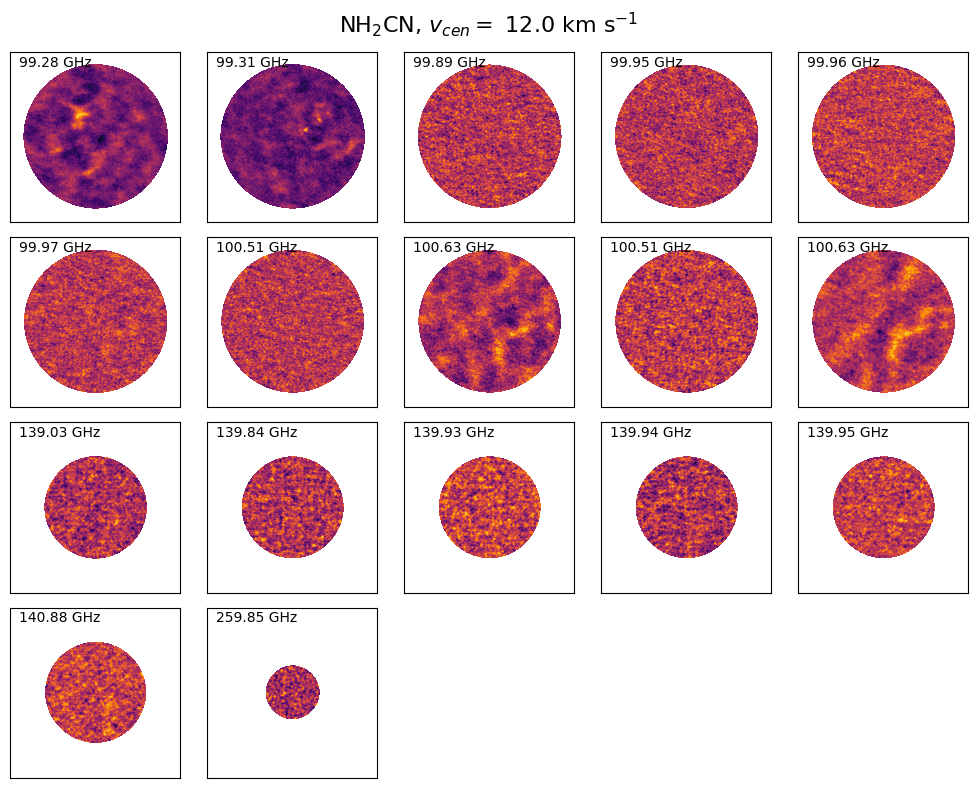

In [24]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=8, nrows=4, ncols=5, name_for_plot=f'NH$_2$CN')